<a href="https://colab.research.google.com/github/Shailendra995/CI_project/blob/main/Gender_Recognition_Using_CNN_ACIT4620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install Laggle
!pip install -q kaggle 

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shailendrabhandari","key":"0829413b17d9f35c5a03f57ab82b52af"}'}

In [ ]:
!nvcc --version
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed')>=0:
  print('Not connected to a GPU')
else:
    print(gpu_info)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Mon Nov 22 23:40:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |            

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-21 16:54:23          16115  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9725  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4457  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3555  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d ttungl/adience-benchmark-gender-and-age-classification 

100% 1.39G/1.39G [00:11<00:00, 160MB/s]



In [ ]:
!unzip adience-benchmark-gender-and-age-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.8448553152_ee57286766_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.8672510540_b644469799_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.8672510848_af2939038b_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.9606205853_8e636e8abb_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1591.8053467917_518c5f2cd3_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1591.8069511407_3390c2bf9c_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1592.8516377288_0d7350e215_o.jpg  
  inflating

In [ ]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data_parent = 'AdienceBenchmarkGenderAndAgeClassification'
print(os.listdir(data_parent))

['faces', '__MACOSX', 'fold_2_data.txt', 'fold_0_data.txt', 'fold_4_data.txt', 'AdienceBenchmarkGenderAndAgeClassification', 'fold_1_data.txt', 'fold_3_data.txt']


In [ ]:

fold_0 = pd.read_csv(os.path.join(data_parent, 'fold_0_data.txt'), sep='\t')
fold_1 = pd.read_csv(os.path.join(data_parent, 'fold_1_data.txt'),sep='\t')
fold_2 = pd.read_csv(os.path.join(data_parent, 'fold_2_data.txt'),sep='\t')
fold_3 = pd.read_csv(os.path.join(data_parent, 'fold_3_data.txt'),sep='\t')
fold_4 = pd.read_csv(os.path.join(data_parent, 'fold_4_data.txt'),sep='\t')
total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [ ]:
print('[+] length of the file:', len(total_data))
print('[+] unique values of Age:')
print(total_data.age.unique())
print('===================================================')
print('[+] Number of None Values in Age:')
print((total_data.age == 'None').sum())
print('[+] unique values of Gender:')
print(total_data.gender.unique())
print('===================================================')
print('[+] Number of nan values in Gender:')
print(total_data.gender.isna().sum())

[+] length of the file: 19370
[+] unique values of Age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
[+] Number of None Values in Age:
748
[+] unique values of Gender:
['f' 'm' nan 'u']
[+] Number of nan values in Gender:
779


# Gender chart

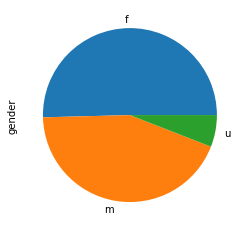

In [ ]:
total_data.groupby('gender')['gender'].count().plot.pie(figsize=(8, 4))

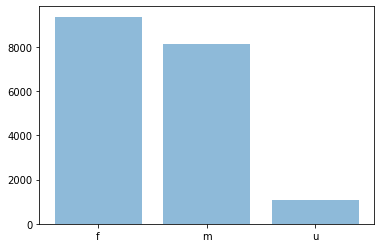

In [ ]:
#bar chart
gender = ['f','m','u']
plt.bar(gender,total_data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

In [ ]:
#total_data.groupby('age')['age'].count().plot.pie(figsize=(10, 5))

[+] Image path: AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399863183_a04f4c26a1_o.jpg
[+] Image shape: (600, 600, 3)
[!] Age: (25, 32) Gender: f


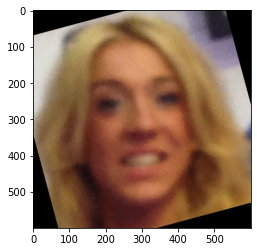

In [ ]:
sample_num = 200
im_name = total_data.iloc[sample_num].original_image
im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
print('[+] Image path:', im_path)
image = cv2.imread(im_path)
print('[+] Image shape:', image.shape)
print('[!] Age:', total_data.iloc[sample_num].age, 'Gender:', total_data.iloc[sample_num].gender)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

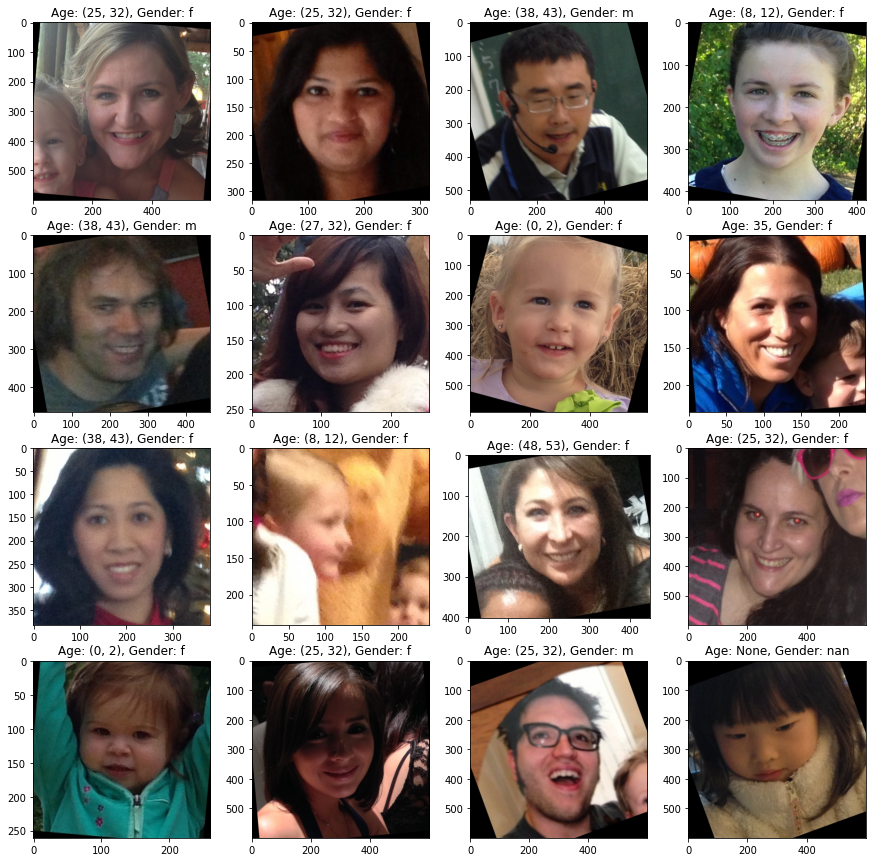

In [ ]:
images = []
for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(15,15))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

In [ ]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}

drop_labels = []
for idx, each in enumerate(total_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        total_data.age.loc[idx] = age_mapping_dict[each]
total_data = total_data.drop(labels=drop_labels, axis=0) #droped None values
total_data.age.value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [ ]:
total_data = total_data.dropna()
total_data['full_path'] = total_data.apply(lambda x: os.path.join(data_parent, 'faces', str(x.user_id), 'coarse_tilt_aligned_face.' + str(x.face_id) + '.' + x.original_image), axis=1)
total_data.age.unique(), len(total_data.age.unique()), total_data.gender.unique()

(array(['25-32', '38-43', '4-6', '60+', '15-20', '48-53', '8-13', '0-2'],
       dtype=object), 8, array(['f', 'm', 'u'], dtype=object))

# Change age and gender mapping

In [ ]:

gender_map = {'f':0, # female 
             'm':1,  # male 
             'u':2}  #others
age_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
total_data.gender = total_data.gender.replace(gender_map)
total_data.age=total_data.age.replace(age_map)

In [ ]:
gender_labels = total_data.gender.values.tolist()
age_labels= total_data.age.values.tolist()
train_paths = total_data.full_path.values.tolist()
len(gender_labels), gender_labels[0],len(age_labels),age_labels[0], train_paths[0]

(18551,
 0,
 18551,
 4,
 'AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399646885_67c7d20df9_o.jpg')

In [ ]:
from sklearn.preprocessing import OneHotEncoder  #for encoding categorical features as a one-hot numeric array.

In [ ]:
shuffle_list = list(zip(train_paths, gender_labels,age_labels))
shuffle_list = random.sample(shuffle_list, len(train_paths))
train_paths, gender_labels,age_labels = zip(*shuffle_list)
age_labels = np.array(list(age_labels)).reshape((-1, 1))
enc= OneHotEncoder()
age_labels = enc.fit_transform(age_labels).toarray() 

In [ ]:
train_split = 0.8 #splitting data set into training and validation set
train_sample = int(train_split * len(total_data))

train_data = train_paths[:train_sample]
validation_data = train_paths[train_sample:]

train_labels_gender = gender_labels[:train_sample]
validation_labels_gender = gender_labels[train_sample:]

train_labels_age=age_labels[:train_sample]
validation_labels_age=age_labels[train_sample:]
print("train data count:")
len(train_data), len(train_labels_gender), len(train_labels_age)
# print("validation data count:")
# len(validation_data), len(validation_labels)

train data count:


(14840, 14840, 14840)

In [ ]:
train_split = 0.8  # same as above but just change the variable name
X = int(train_split * len(total_data))

X_train = train_paths[:X]
X_test = train_paths[train_sample:]

train_labels_gender = gender_labels[:X]
validation_labels_gender = gender_labels[X:]

y_train=age_labels[:X]
y_test=age_labels[X:]
print("train data count:")
len(train_data), len(train_labels_gender), len(train_labels_age)
# print("validation data count:")
# len(validation_data), len(validation_labels)

train data count:


(14840, 14840, 14840)

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import multiprocessing

In [ ]:
#classifying data into training and validation set
train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_age)))
validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_age)))

In [ ]:
for path, target1 in train_dataset.take(1):
    print(path, target1)

tf.Tensor(b'AdienceBenchmarkGenderAndAgeClassification/faces/45666944@N00/coarse_tilt_aligned_face.406.11843454376_c493221f54_o.jpg', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0.], shape=(8,), dtype=float64)


In [ ]:


def preprocess_func(path, label_age):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_age

In [ ]:
import multiprocessing

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

**Gender Classification Model**

# Gender Classification with results

In [ ]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender)))
validation_dataset2 = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_gender)))

In [ ]:
for path, target1 in train_dataset2.take(1):
    print(path, target1)

tf.Tensor(b'AdienceBenchmarkGenderAndAgeClassification/faces/45666944@N00/coarse_tilt_aligned_face.406.11843454376_c493221f54_o.jpg', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
train_batches2 = train_dataset2.shuffle(100).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches2 = validation_dataset2.shuffle(100).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)

(16, 128, 128, 3) (16,)
tf.Tensor(0, shape=(), dtype=int32)


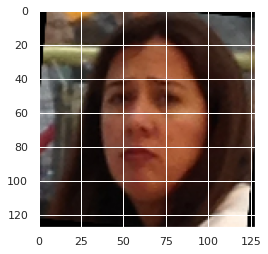

In [ ]:

for image, target1 in train_batches2.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [ ]:
def preprocess_func(path, label_gender):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_gender

(16, 128, 128, 3) (16,)
tf.Tensor(1, shape=(), dtype=int32)


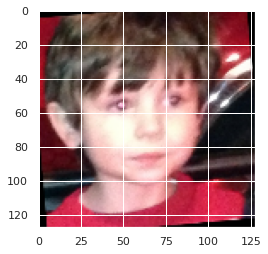

In [ ]:
for image, target1 in train_batches2.take(20):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[1])
    print(target1[1])

    plt.imshow(image)
    plt.show()
    break

In [ ]:
gender_model = Sequential() # the model 

gender_model.add(Conv2D(64, kernel_size=(3,3), input_shape=(128, 128, 3), activation='elu')) # all the activation function mentioned in the report are tuned here
gender_model.add(MaxPooling2D(pool_size=(2,2)))                                               # for example relu, sigmoid, Lrelu and so on 
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='elu')) 
gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.4))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(256, kernel_size=(3,3), activation='elu'))
gender_model.add(Conv2D(256, kernel_size=(3,3), activation='elu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())

gender_model.add(Dense(64, activation='elu'))
gender_model.add(Dropout(0.4))

gender_model.add(Dense(1, activation='sigmoid')) #For binary classification activation function is sigmoid and is constant for all 

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #...and loss function is binary_crossentropy

gender_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 128)      0

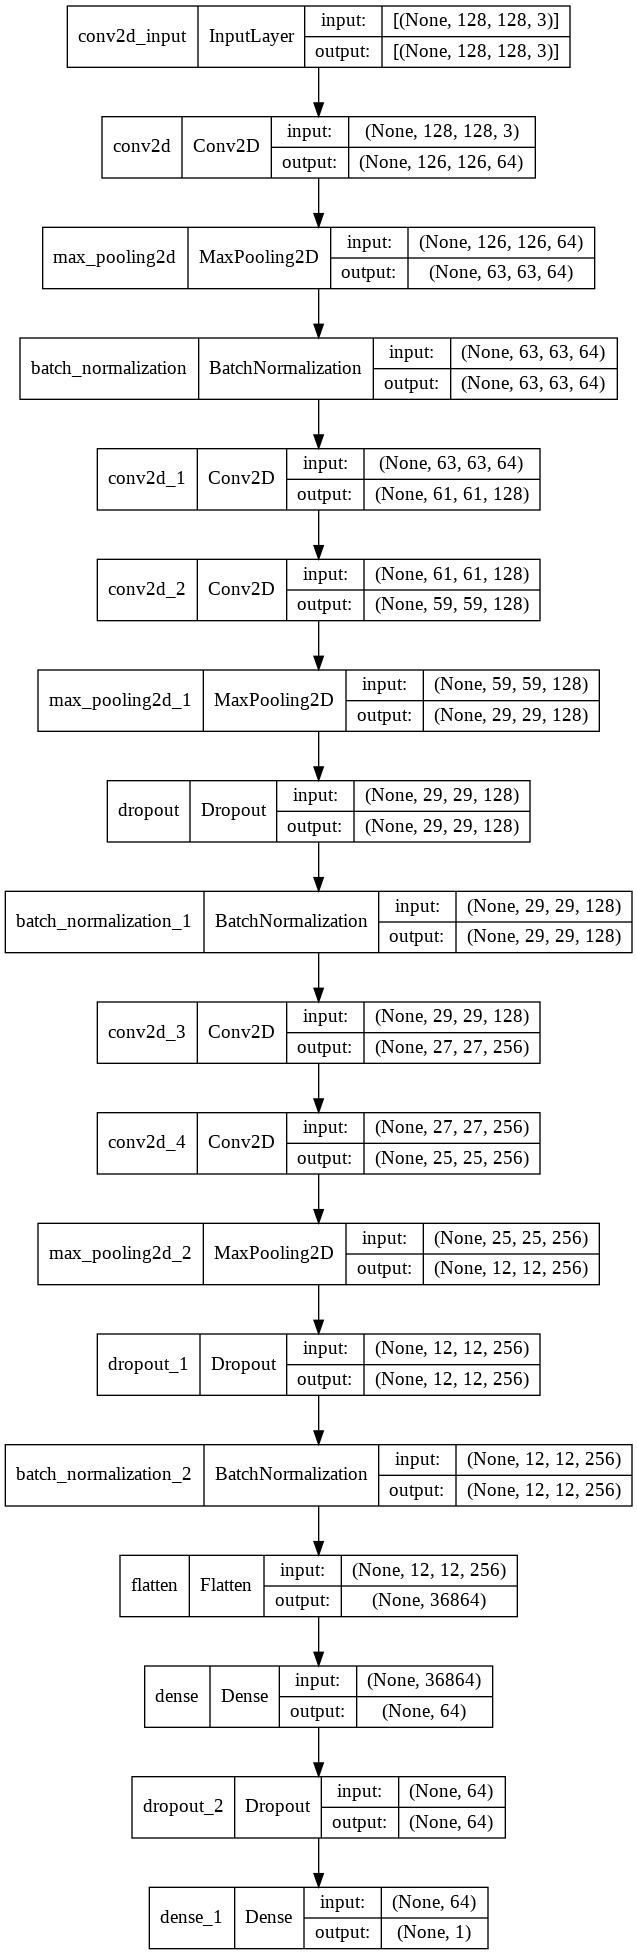

In [ ]:
tf.keras.utils.plot_model(gender_model, show_shapes=True) # to print out the model 

In [ ]:
#tf.keras.utils.plot_model(gender_model, to_file='model.png') # another way to print out the model

In [ ]:
 history = gender_model.fit(train_batches2, epochs=50, validation_data = validation_batches2) # for training model: it was done in different epoch as mentioned in report

Epoch 1/50
928/928 [==============================] - 52s 46ms/step - loss: 0.7757 - accuracy: 0.5582 - val_loss: -1.2213 - val_accuracy: 0.6184
Epoch 2/50
928/928 [==============================] - 21s 23ms/step - loss: -12.8983 - accuracy: 0.5489 - val_loss: -16.4114 - val_accuracy: 0.5591
Epoch 3/50
928/928 [==============================] - 21s 23ms/step - loss: -306.8857 - accuracy: 0.5580 - val_loss: -1505.9109 - val_accuracy: 0.5637
Epoch 4/50
928/928 [==============================] - 21s 23ms/step - loss: -3407.5923 - accuracy: 0.5587 - val_loss: -2870.4436 - val_accuracy: 0.5212
Epoch 5/50
928/928 [==============================] - 21s 23ms/step - loss: -19865.5273 - accuracy: 0.5286 - val_loss: -36616.4609 - val_accuracy: 0.5212
Epoch 6/50
928/928 [==============================] - 21s 23ms/step - loss: -72799.4922 - accuracy: 0.5257 - val_loss: -125397.5234 - val_accuracy: 0.5225
Epoch 7/50
928/928 [==============================] - 21s 23ms/step - loss: -182491.3281 - accu

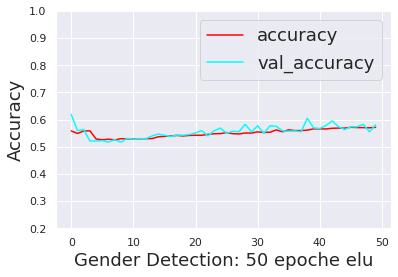

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy',color= 'red')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy',color ="cyan")
plt.xlabel('Gender Detection: 50 epoche elu', fontsize =18)
plt.ylabel('Accuracy',fontsize=18)
plt.ylim([0.2, 1])
plt.legend(loc='upper right', fontsize= 18)

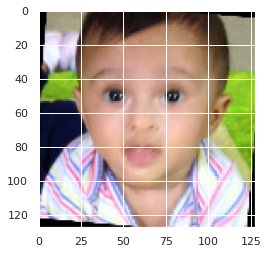

In [ ]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [ ]:
image = np.expand_dims(image, 0)
prediction = gender_model.predict(image)

In [ ]:
index = np.argmax(prediction)
decoding = {0:'f', 1:'m', 2:'u'}

print('[] prediction is :', decoding[index]) # for prediction 

[] prediction is : f


**Age Classification**


In [ ]:
train_batches = train_dataset.shuffle(100).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = validation_dataset.shuffle(100).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)

(16, 128, 128, 3) (16, 8)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0.], shape=(8,), dtype=float64)


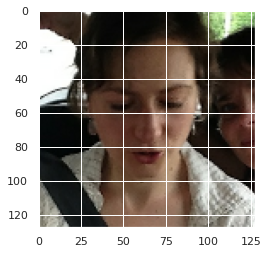

In [ ]:
for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='elu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='elu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='elu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='elu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 8)         224       
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

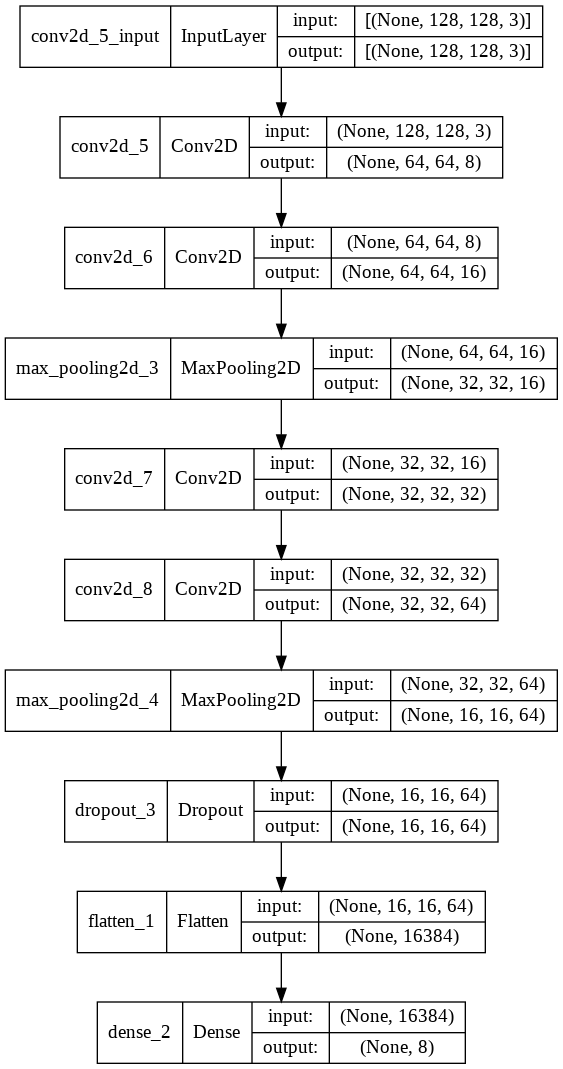

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Age classification (training with results)

In [ ]:
 history = model.fit(train_batches, epochs=50, validation_data = validation_batches)

Epoch 1/50
928/928 [==============================] - 48s 51ms/step - loss: 1.6036 - accuracy: 0.4028 - val_loss: 1.4396 - val_accuracy: 0.4611
Epoch 2/50
928/928 [==============================] - 8s 9ms/step - loss: 1.3358 - accuracy: 0.5000 - val_loss: 1.3513 - val_accuracy: 0.5020
Epoch 3/50
928/928 [==============================] - 8s 8ms/step - loss: 1.1844 - accuracy: 0.5627 - val_loss: 1.3020 - val_accuracy: 0.5195
Epoch 4/50
928/928 [==============================] - 8s 8ms/step - loss: 1.0703 - accuracy: 0.6046 - val_loss: 1.2885 - val_accuracy: 0.5371
Epoch 5/50
928/928 [==============================] - 8s 9ms/step - loss: 0.9864 - accuracy: 0.6342 - val_loss: 1.3035 - val_accuracy: 0.5381
Epoch 6/50
928/928 [==============================] - 8s 9ms/step - loss: 0.9088 - accuracy: 0.6625 - val_loss: 1.3102 - val_accuracy: 0.5279
Epoch 7/50
928/928 [==============================] - 8s 9ms/step - loss: 0.8422 - accuracy: 0.6874 - val_loss: 1.3798 - val_accuracy: 0.5397
Epoc

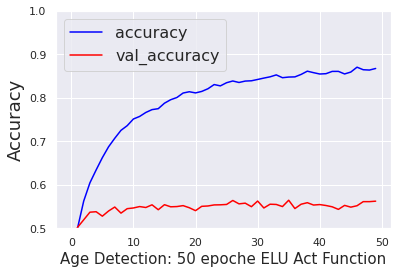

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy', color= 'blue')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color ='red')
plt.xlabel('Age Detection: 50 epoche ELU Act Function', fontsize =15)
plt.ylabel('Accuracy', fontsize =18)
plt.ylim([0.5, 1])
plt.legend(loc='upper left',fontsize =16)
#plt.savefig('/home/shailendra/Desktop/Ci_fig/elu_act_10epoch.pdf', dpi=200) 

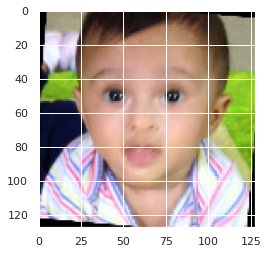

In [ ]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [ ]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

In [ ]:
index = np.argmax(prediction)
decoding = {0:'0-2', 1:'4-6', 2:'8-13',3:'15-20',4:'25-32',5:'38-43',6:'48-53',7:'60+'}

print('[+] prediction is :', decoding[index]) 
# print(validation_data[7].age_labels)

[+] prediction is : 0-2
